# Various examples of Plotting a Spectrum

In [2]:
import becquerel as bq
import numpy as np
import matplotlib.pyplot as plt

spec1 = bq.Spectrum.from_file('../tests/samples/1110C NAA cave pottery.Spe')
spec2 = bq.Spectrum.from_file('../tests/samples/Mendocino_07-10-13_Acq-10-10-13.Spe')

SpeFile: Reading file ../tests/samples/1110C NAA cave pottery.Spe
Line 16414 unknown:  $PRESETS:
Line 16415 unknown:  Live Time
Line 16416 unknown:  86400
Line 16417 unknown:  0
SpeFile: Reading file ../tests/samples/Mendocino_07-10-13_Acq-10-10-13.Spe
Line 8207 unknown:  $PRESETS:
Line 8208 unknown:  None
Line 8209 unknown:  0
Line 8210 unknown:  0


## Spectrum plot method

A spectrum has a plot method, it takes a x_mode and y_mode argument to define what will be plotted on the respective axis, it also takes a yscale ('linear', 'log', 'symlog') and title argument.

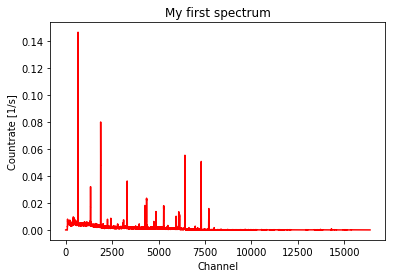

In [14]:
spec1.plot('-r', x_mode='channel', y_mode='cps', title='My first spectrum')
plt.show()

A spectrum also has a fill_between method and can take an axes object. If multiple spectrum are plotted, the last call will overwrite the arguments of previous calls (title, yscale). Any matplotlib's plot and fill_between keyword arguments can be passed to the function.

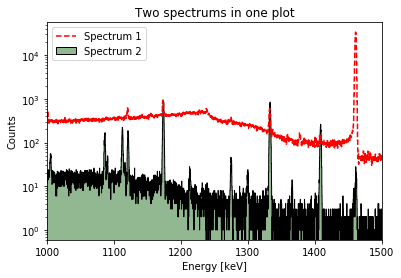

In [28]:
fig, ax = plt.subplots()
ax.set_xlim((1000, 1500))
spec2.plot('--', x_mode='keV', y_mode='cnt', ax=ax, 
           label="Spectrum 1", color='red')
spec1.fill_between(x_mode='energy', y_mode='counts', ax=ax, yscale='log', title='Two spectrums in one plot',
                   label="Spectrum 2", edgecolor='black', facecolor=(0.15,0.45,0.15,0.5))
plt.legend()
plt.show()

The plotting command returns an axis object, which can be altered to change plot properties.

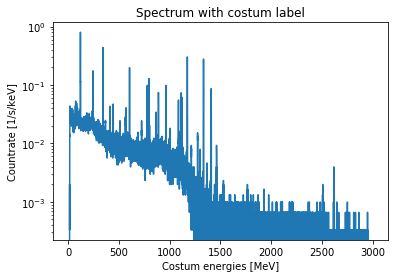

In [33]:
ax = spec1.plot(x_mode='energy', y_mode='cpskev', yscale='log', title='Spectrum with costum label', 
                   label="Spectrum 2")
ax.set_xlabel("Costum energies [MeV]")
plt.show()

There is also a SpectrumPlotter which is quite powerful and can be used for producing costum matplotlib plots of Spectrums. There are additional methods available such as get_corners() and properties such as xlim, ylim, linthreshy. If the matplotlib default values are not good enough these might be the once you want.

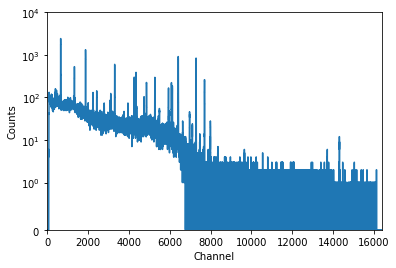

In [34]:
from becquerel import SpectrumPlotter
plt.figure()
sp = SpectrumPlotter(spec1, x_mode = 'channel', y_mode = 'counts', yscale='symlog')
xcorners, ycorners = sp.get_corners()
plt.plot(xcorners, ycorners)
plt.xlabel(sp.xlabel)
plt.ylabel(sp.ylabel)
plt.yscale('symlog', linthreshy=sp.linthreshy)
plt.xlim(sp.xlim)
plt.ylim(sp.ylim)
plt.show()

The SpectrumPlotter class has it's own plot and fill_between method. They also take matplotlib function keyword arguments, which overwrite previously defined properties.

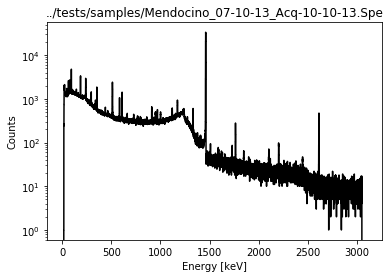

In [31]:
SpectrumPlotter(spec2, yscale='log', color = "red").plot(color = "black")
plt.show()